# KLLR Exploration

After a first preliminary analysis of the data, we decided to explore for some trends. Specifically we wanted to see how the G3 exams values varied with respect to certain features

### Import KLLR and Data

In [1]:
!pip install --upgrade git+https://github.com/afarahi/kllr.git
import kllr as kl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/afarahi/kllr.git to /tmp/pip-req-build-jb1a0o4f
  Running command git clone --filter=blob:none --quiet https://github.com/afarahi/kllr.git /tmp/pip-req-build-jb1a0o4f
  Resolved https://github.com/afarahi/kllr.git to commit 871d2afca647a8291554803850959e6f03933f15
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kllr: filename=kllr-2.101-py3-none-any.whl size=22264 sha256=d5e13ab813230e85b28a63fc6bbf376bd8f36a6ba8e2344ff424361e477ed79f
  Stored in directory: /tmp/pip-ephem-wheel-cache-orces1s_/wheels/80/c1/2a/bd6e2af7d9da77aa366d5b3d26369b937084e0334c39c3bfe0
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=76971ace37e88ebde6ad8c5c335db99e9fcb4f41149e6dc3bed935ebbf2da740
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d9

In [14]:
df_math = pd.read_excel('student-mat.xlsx')
df_port = pd.read_excel('student-por.xlsx')

df_math = df_math.replace(('GP', 'MS', 'F', 'M', 'U', 'R', 
                           'LE3', 'GT3', 
                           'T', 'A',
                           'teacher', 'health', 'services', 'at_home', 'other', 
                           'home', 'reputation', 'course',
                           'mother', 'father',
                           'yes', 'no'), 
                          (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
                           1, 2, 3, 4, 5, 
                           1, 2, 3, 
                           1, 2, 
                           1, 0))

df_port = df_port.replace(('GP', 'MS', 'F', 'M', 'U', 'R', 
                           'LE3', 'GT3', 
                           'T', 'A',
                           'teacher', 'health', 'services', 'at_home', 'other', 
                           'home', 'reputation', 'course',
                           'mother', 'father',
                           'yes', 'no'), 
                          (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
                           1, 2, 3, 4, 5, 
                           1, 2, 3, 
                           1, 2, 
                           1, 0))

DF = (
    ('Math', df_math, 300),
    ('Portugues', df_port, 600)
     )

### Parents Education, Age, Failures, Parents Job vs G3

G3 is plotted against the level of parental education (0: none, 4: higher than secondary education)

/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regre

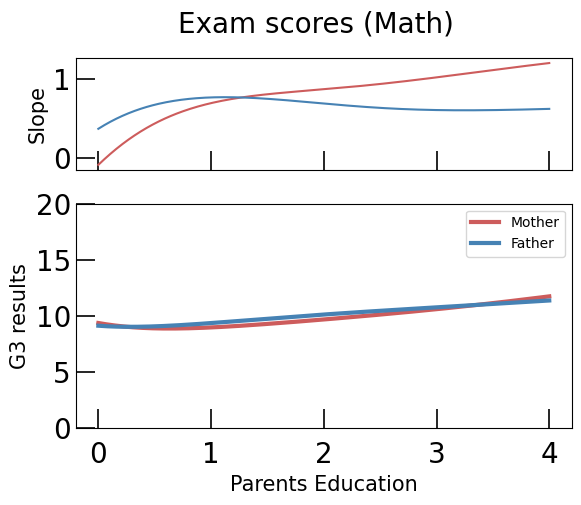

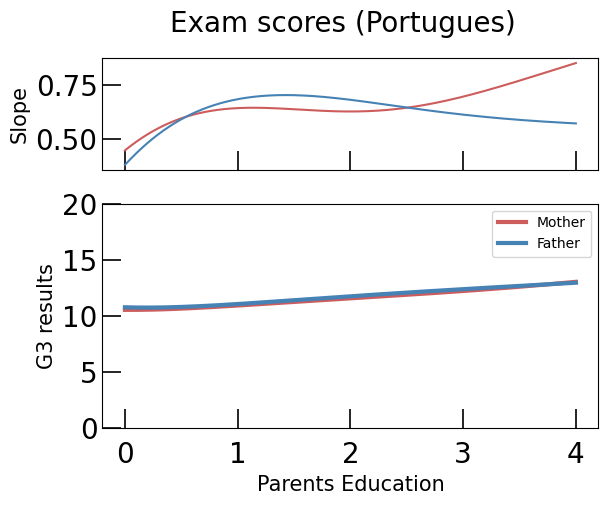

In [3]:
for exam, df, bins in DF:

  mother_education = df['Medu']
  father_education = df['Fedu'] 

  kernel_size = 1

  lm1 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  mother_education, G3_results_m, intercept_exp_m, slope_exp_m, scatter_exp_m, skew_m, kurt_m = lm1.fit(mother_education, df['G3'], bins=bins, nBootstrap=1)

  lm2 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  father_education, G3_results_f, intercept_exp_f, slope_exp_f, scatter_exp_f, skew_f, kurt_f = lm2.fit(father_education, df['G3'], bins=bins, nBootstrap=1)

  medu_g3_pred = pd.DataFrame({'Mother education':mother_education, 'G3 results': G3_results_m})

  fedu_g3_pred = pd.DataFrame({'Father education':father_education, 'G3 results': G3_results_f})

  s = exam

  fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
  fig.suptitle('Exam scores (%s)'%s, fontsize=20)


  ax1.plot(medu_g3_pred['Mother education'], slope_exp_m, color='indianred')
  ax1.plot(fedu_g3_pred['Father education'], slope_exp_f, color='steelblue')
  ax1.set_ylabel('Slope', size=15)
  

  ax2.plot(medu_g3_pred['Mother education'], medu_g3_pred['G3 results'], lw=3.0, color='indianred', label='Mother')
  ax2.plot(fedu_g3_pred['Father education'], fedu_g3_pred['G3 results'], lw=3.0, color='steelblue', label='Father')
  ax2.set_xlabel('Parents Education', size=15)
  ax2.set_ylabel('G3 results', size=15)
  ax2.set_ylim(0,20)
  ax2.legend()

/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D


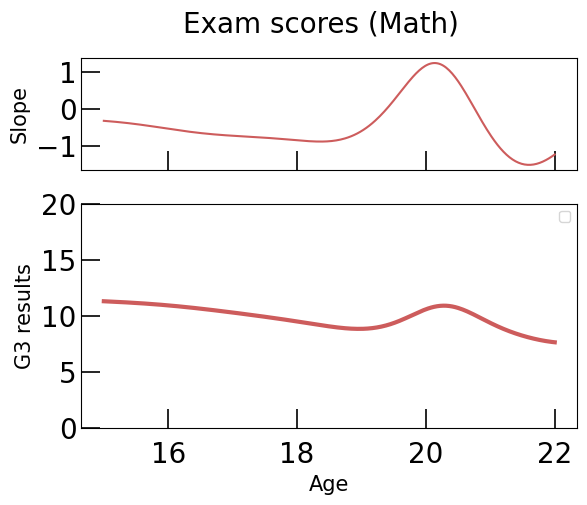

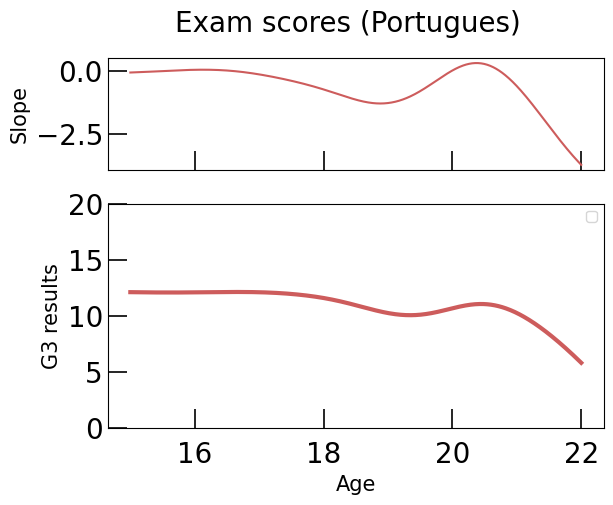

In [4]:
for exam, df, bins in DF:

  age = df['age']

  kernel_size = 0.8

  lm1 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  age, G3_results, intercept_exp, slope_exp, scatter_exp, skew, kurt = lm1.fit(age, df['G3'], bins=bins, nBootstrap=1)

  age_g3_pred = pd.DataFrame({'Age': age , 'G3 results': G3_results})

  s = exam

  fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
  fig.suptitle('Exam scores (%s)'%s, fontsize=20)


  ax1.plot(age_g3_pred['Age'], slope_exp, color='indianred')
  ax1.set_ylabel('Slope', size=15)
  

  ax2.plot(age_g3_pred['Age'], age_g3_pred['G3 results'], lw=3.0, color='indianred')
  ax2.set_xlabel('Age', size=15)
  ax2.set_ylabel('G3 results', size=15)
  ax2.set_ylim(0,20)
  ax2.legend()

/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D


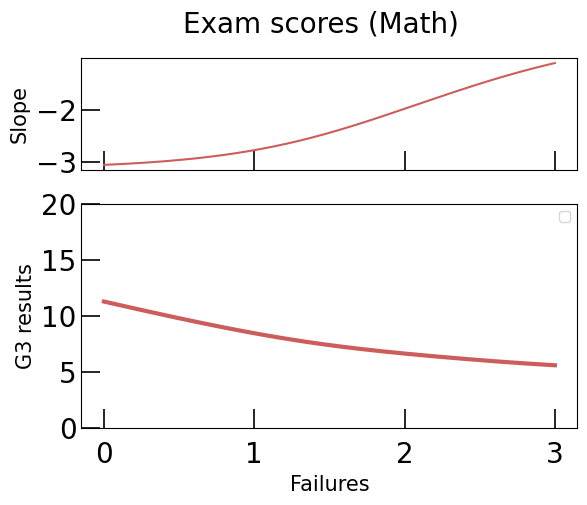

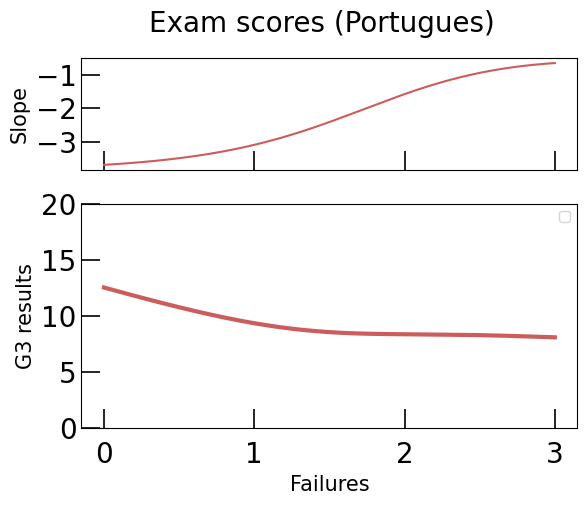

In [5]:
for exam, df, bins in DF:

  fails = df['failures']

  kernel_size = 0.8

  lm1 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  fails, G3_results, intercept_exp, slope_exp, scatter_exp, skew, kurt = lm1.fit(fails, df['G3'], bins=bins, nBootstrap=1)

  fails_g3_pred = pd.DataFrame({'Fails': fails, 'G3 results': G3_results})

  s = exam

  fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
  fig.suptitle('Exam scores (%s)'%s, fontsize=20)


  ax1.plot(fails_g3_pred['Fails'], slope_exp, color='indianred')
  ax1.set_ylabel('Slope', size=15)
  

  ax2.plot(fails_g3_pred['Fails'], fails_g3_pred['G3 results'], lw=3.0, color='indianred')
  ax2.set_xlabel('Failures', size=15)
  ax2.set_ylabel('G3 results', size=15)
  ax2.set_ylim(0,20)
  ax2.legend()

/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regression_model.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if len(X.shape) == 1: X = X[:, None] #Make sure X is atleast 2D
/usr/local/lib/python3.9/dist-packages/kllr/regre

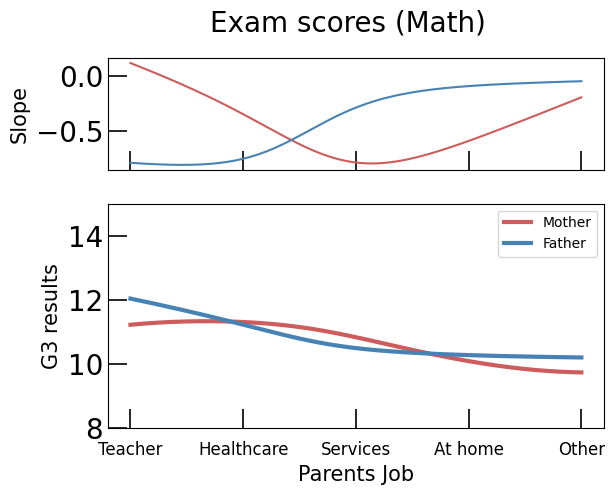

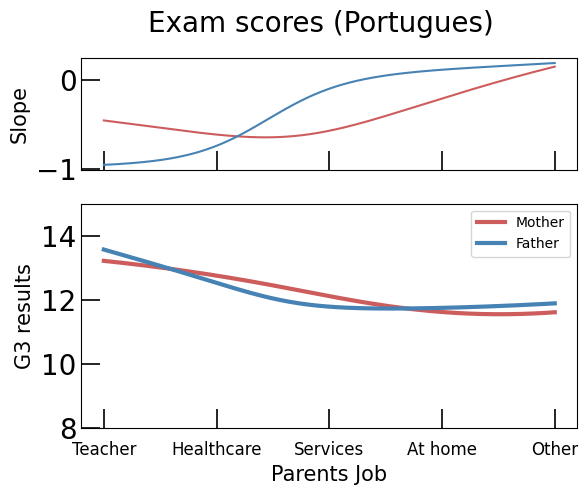

In [17]:
for exam, df, bins in DF:

  mother_job = df['Mjob']
  father_job = df['Fjob'] 

  kernel_size = 1

  lm1 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  mother_job, G3_results_m, intercept_exp_m, slope_exp_m, scatter_exp_m, skew_m, kurt_m = lm1.fit(mother_job, df['G3'], bins=bins, nBootstrap=1)

  lm2 = kl.kllr_model(kernel_type = 'gaussian', kernel_width = kernel_size)
  father_job, G3_results_f, intercept_exp_f, slope_exp_f, scatter_exp_f, skew_f, kurt_f = lm2.fit(father_job, df['G3'], bins=bins, nBootstrap=1)

  mjob_g3_pred = pd.DataFrame({'Mother job':mother_job, 'G3 results': G3_results_m})

  fjob_g3_pred = pd.DataFrame({'Father job':father_job, 'G3 results': G3_results_f})

  s = exam

  fig, (ax1,ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True)
  fig.suptitle('Exam scores (%s)'%s, fontsize=20)


  ax1.plot(mjob_g3_pred['Mother job'], slope_exp_m, color='indianred')
  ax1.plot(fjob_g3_pred['Father job'], slope_exp_f, color='steelblue')
  ax1.set_ylabel('Slope', size=15)
  

  ax2.plot(mjob_g3_pred['Mother job'], mjob_g3_pred['G3 results'], lw=3.0, color='indianred', label='Mother')
  ax2.plot(fjob_g3_pred['Father job'], fjob_g3_pred['G3 results'], lw=3.0, color='steelblue', label='Father')
  ax2.set_xlabel('Parents Job', size=15)
  ax2.set_ylabel('G3 results', size=15)
  ax2.set_xticks([1,2,3,4,5])
  ax2.set_xticklabels(['Teacher', 'Healthcare', 'Services', 'At home', 'Other'], size=12)
  ax2.set_ylim(8,15)
  ax2.legend()

###Student Quality

In the following, we define good, average or bad students by looking at the daily and weekend alcohol usage, the absences during the year and how much time do they go out during a week.
These four features are normalized and then summed together into a new variable. As a first threshold, giving us the boundary between an average and a bad student, we chose the sum between the mean values of each cathegory plus one sigma.

In [6]:
norm_goout_port = df_port['goout']/max(df_port['goout'])
norm_absences_port = df_port['absences']/max(df_port['absences'])
norm_dalc_port = df_port['Dalc']/max(df_port['Dalc'])
norm_walc_port = df_port['Walc']/max(df_port['Walc'])

norm_goout_math = df_math['goout']/max(df_math['goout'])
norm_absences_math = df_math['absences']/max(df_math['absences'])
norm_dalc_math = df_math['Dalc']/max(df_math['Dalc'])
norm_walc_math = df_math['Walc']/max(df_math['Walc'])

df_port['studquality'] = norm_goout_port + norm_absences_port + norm_dalc_port + norm_walc_port
df_math['studquality'] = norm_goout_math + norm_absences_math + norm_dalc_math + norm_walc_math

print('Portuguese mean+std:', np.mean(df_port['studquality'])+np.std(df_port['studquality']))
print('Math mean+std:', np.mean(df_math['studquality'])+np.std(df_math['studquality']))

print('Portuguese Max quality:', max(df_port['studquality']))
print('Math Max quality:', max(df_math['studquality']))

mean_std_port = np.mean(df_port['studquality'])+np.std(df_port['studquality'])
mean_std_math = np.mean(df_math['studquality'])+np.std(df_math['studquality'])

DF = (('Portuguese', df_port, mean_std_port, 600),
      ('Math', df_math, mean_std_math, 300))

Portuguese mean+std: 2.082030951190739
Math mean+std: 2.000921440800415
Portuguese Max quality: 3.375
Math Max quality: 3.2133333333333334


**Mother Education**

100%|██████████| 34/34 [00:02<00:00, 11.94it/s]


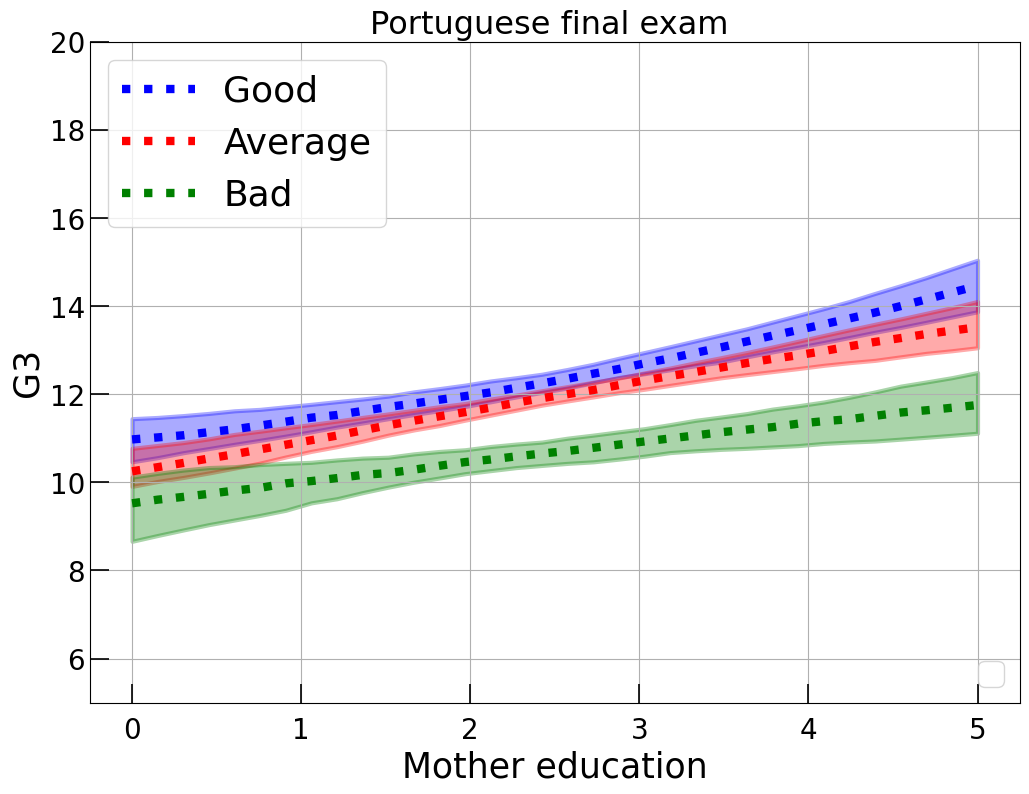

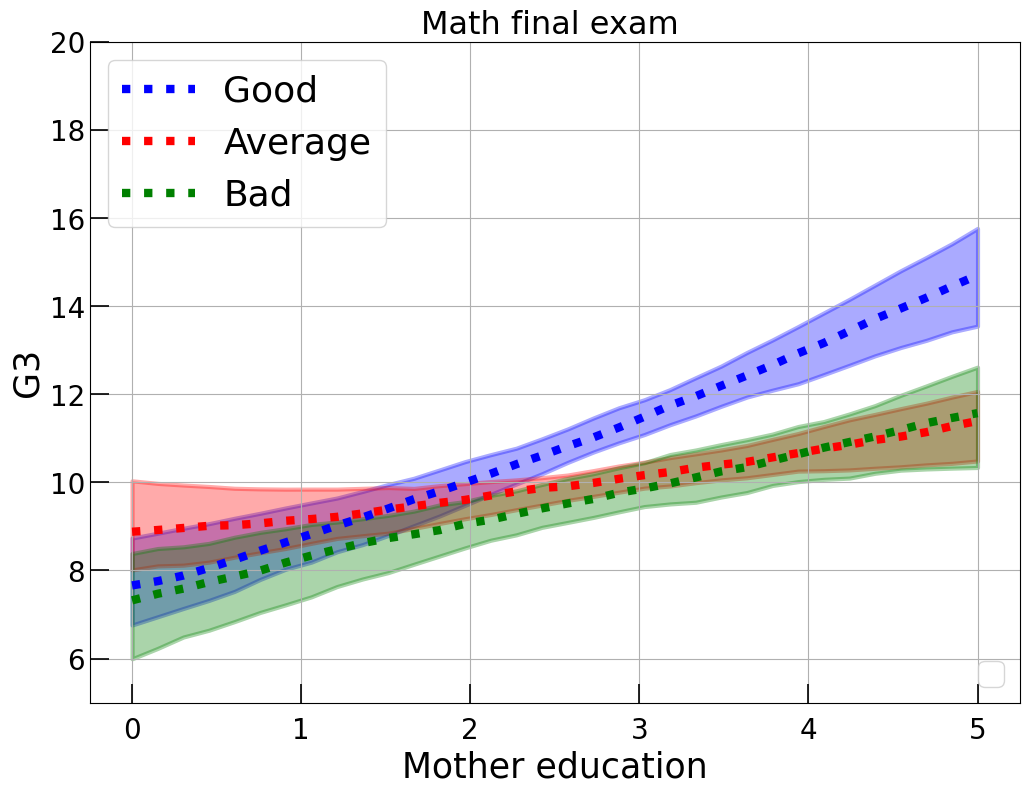

In [7]:
for exam, df, mean_std, bins in DF: 

  _, ax = kl.Plot_Fit_Summary_Split(df, 'Medu', 'G3',  'studquality', split_bins=[0, 1.2, mean_std, max(df['studquality'])+0.001],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 5], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=100, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['blue', 'red', 'green'], cmap = None, ax=None)

  ax.flat[1].set_visible(False)
  ax.flat[2].set_visible(False)

  ax[0].lines[0].set_label(None)
  ax[0].lines[1].set_label(None)
  ax[0].lines[2].set_label(None)


  for line in ax[0].get_lines()[:]: line.set_linewidth(6)

  legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ['Good', 'Average', 'Bad'], prop={'size':26}, loc=2)
  ax[0].add_artist(legend1)
  ax[0].legend(loc=4, prop={'size':23})

  s = exam

  ax[0].set_ylabel('G3', size=25)
  ax[0].set_xlabel('Mother education', size=25)
  ax[0].tick_params(labelbottom=True)
  ax[0].set_title("%s final exam "%s, size=23)
  ax[0].set_ylim(5,20)
   


**Father Education**

100%|██████████| 34/34 [00:03<00:00,  8.91it/s]


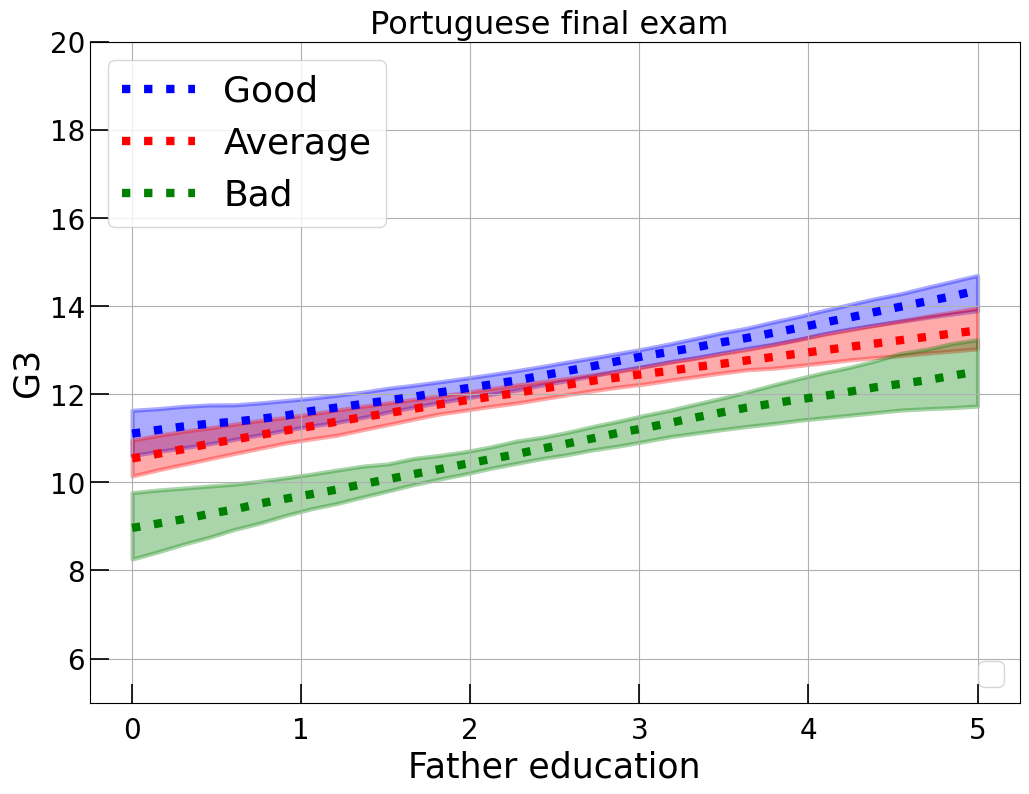

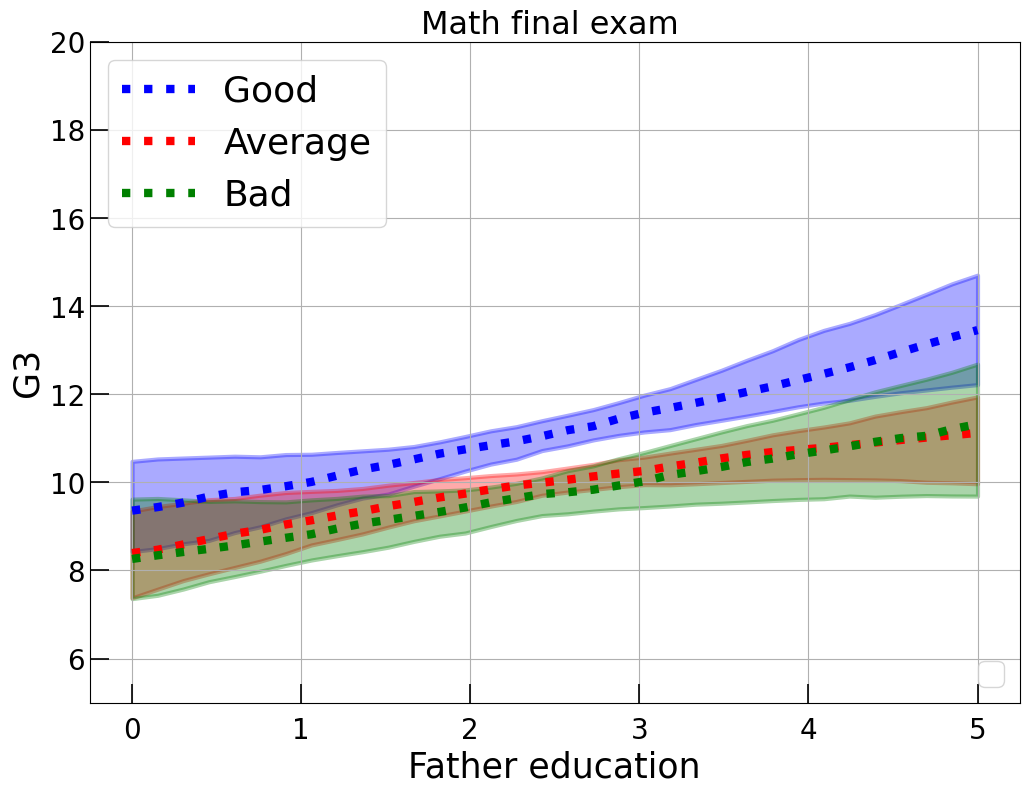

In [8]:
for exam, df, mean, bins in DF: 

  _, ax = kl.Plot_Fit_Summary_Split(df, 'Fedu', 'G3',  'studquality', split_bins=[0, 1.2, mean_std, max(df['studquality'])+0.001],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 5], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=100, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['blue', 'red', 'green'], cmap = None, ax=None)

  ax.flat[1].set_visible(False)
  ax.flat[2].set_visible(False)

  ax[0].lines[0].set_label(None)
  ax[0].lines[1].set_label(None)
  ax[0].lines[2].set_label(None)


  for line in ax[0].get_lines()[:]: line.set_linewidth(6)

  legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ['Good', 'Average', 'Bad'], prop={'size':26}, loc=2)
  ax[0].add_artist(legend1)
  ax[0].legend(loc=4, prop={'size':23})

  s = exam

  ax[0].set_ylabel('G3', size=25)
  ax[0].set_xlabel('Father education', size=25)
  ax[0].tick_params(labelbottom=True)
  ax[0].set_title("%s final exam "%s, size=23)
  ax[0].set_ylim(5,20)
   


### Absences only

**Mother Education**

100%|██████████| 6/6 [00:00<00:00,  7.76it/s]


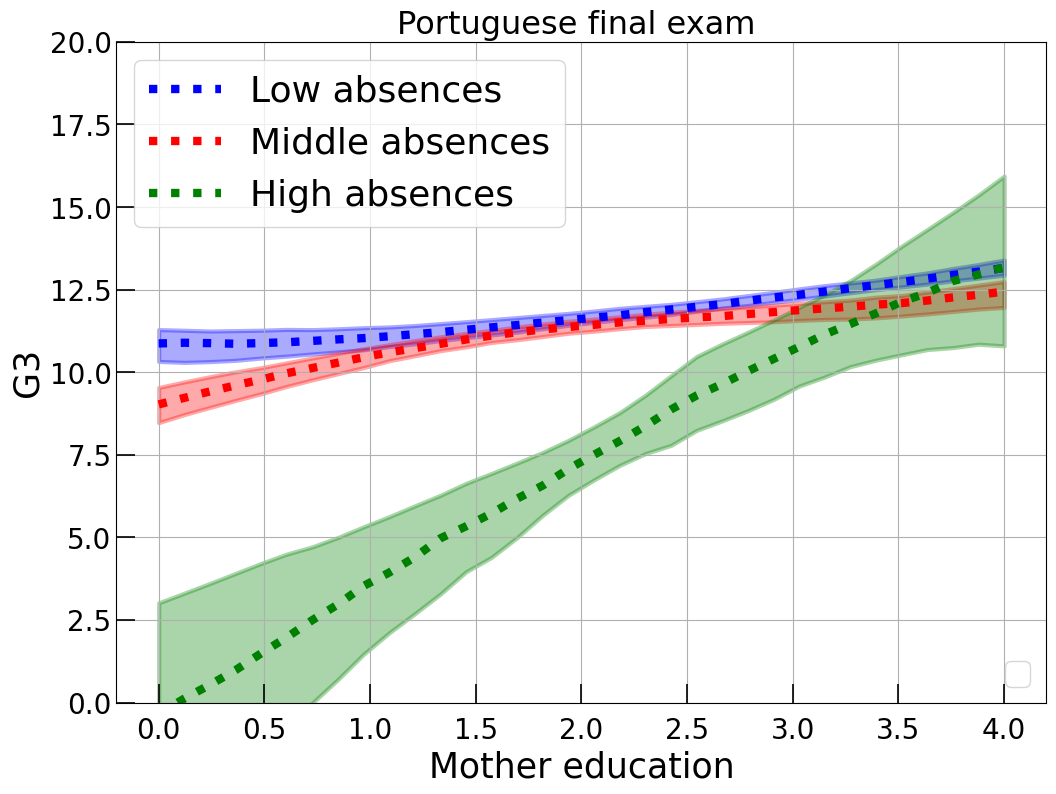

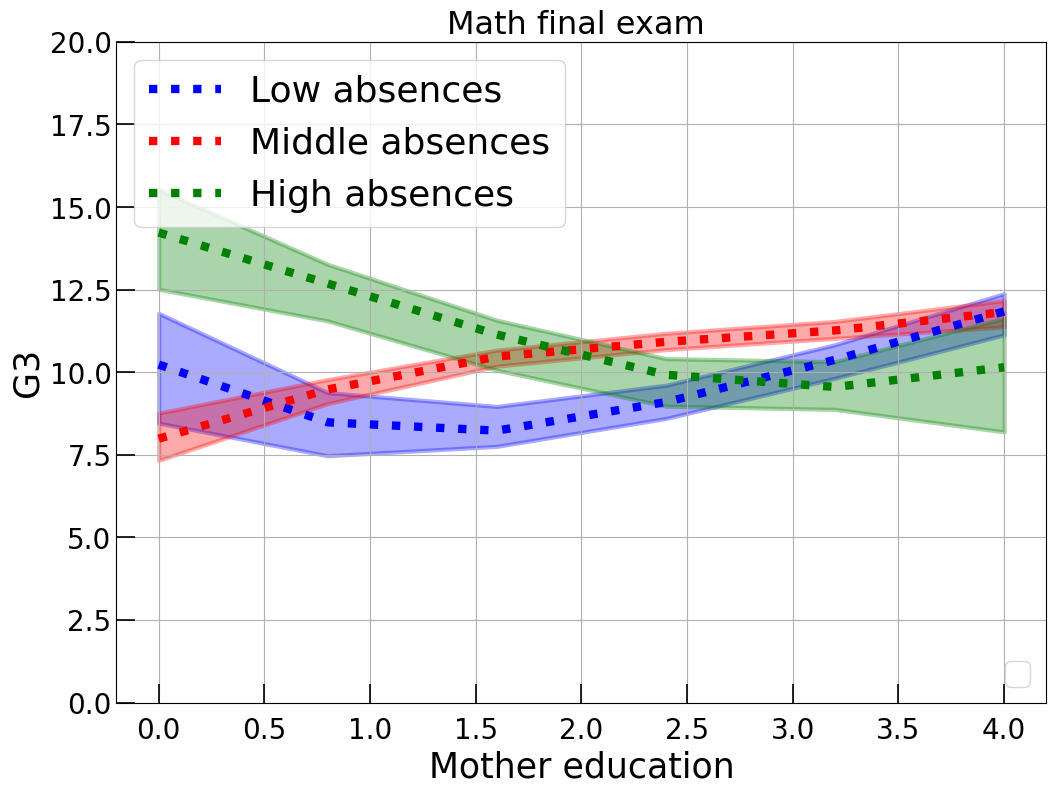

In [9]:
for exam, df, mean_std, bins in DF:


  if exam == 'Math':
    layers = [0-0.5, 2.5, 21.5, max(df['absences'])+1]
    bins = 6
  else:
    layers = [0-0.5, 5.5, 21.5, max(df['absences'])+1]
    bins = 34

  _, ax = kl.Plot_Fit_Summary_Split(df, 'Medu', 'G3',  'absences', split_bins=layers,
                                  split_mode = 'Data', y_err=None, bins=bins, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=100, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['blue', 'red', 'green'], cmap = None, ax=None)

  ax.flat[1].set_visible(False)
  ax.flat[2].set_visible(False)

  ax[0].lines[0].set_label(None)
  ax[0].lines[1].set_label(None)
  ax[0].lines[2].set_label(None)


  for line in ax[0].get_lines()[:]: line.set_linewidth(6)

  legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ['Low absences', 'Middle absences', 'High absences'], prop={'size':26}, loc=2)
  ax[0].add_artist(legend1)
  ax[0].legend(loc=4, prop={'size':23})

  s = exam

  ax[0].set_ylabel('G3', size=25)
  ax[0].set_xlabel('Mother education', size=25)
  ax[0].tick_params(labelbottom=True)
  ax[0].set_title("%s final exam "%s, size=23)
  ax[0].set_ylim(0,20)

**Father Education**

100%|██████████| 6/6 [00:00<00:00,  7.72it/s]


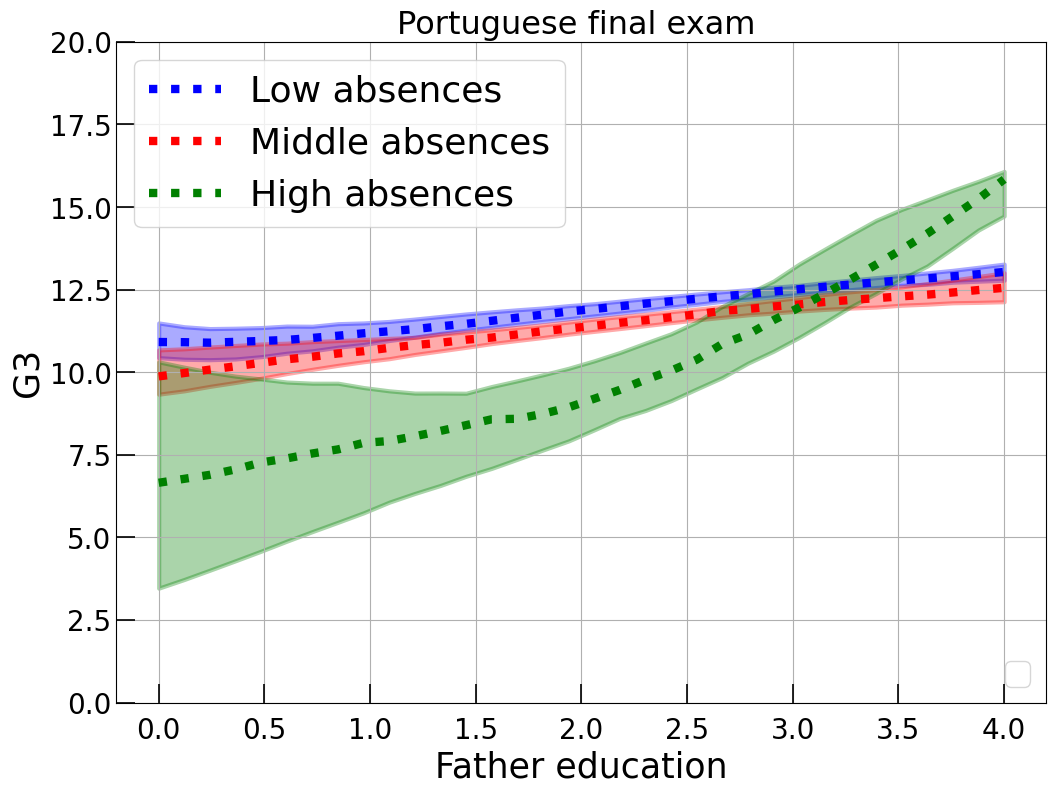

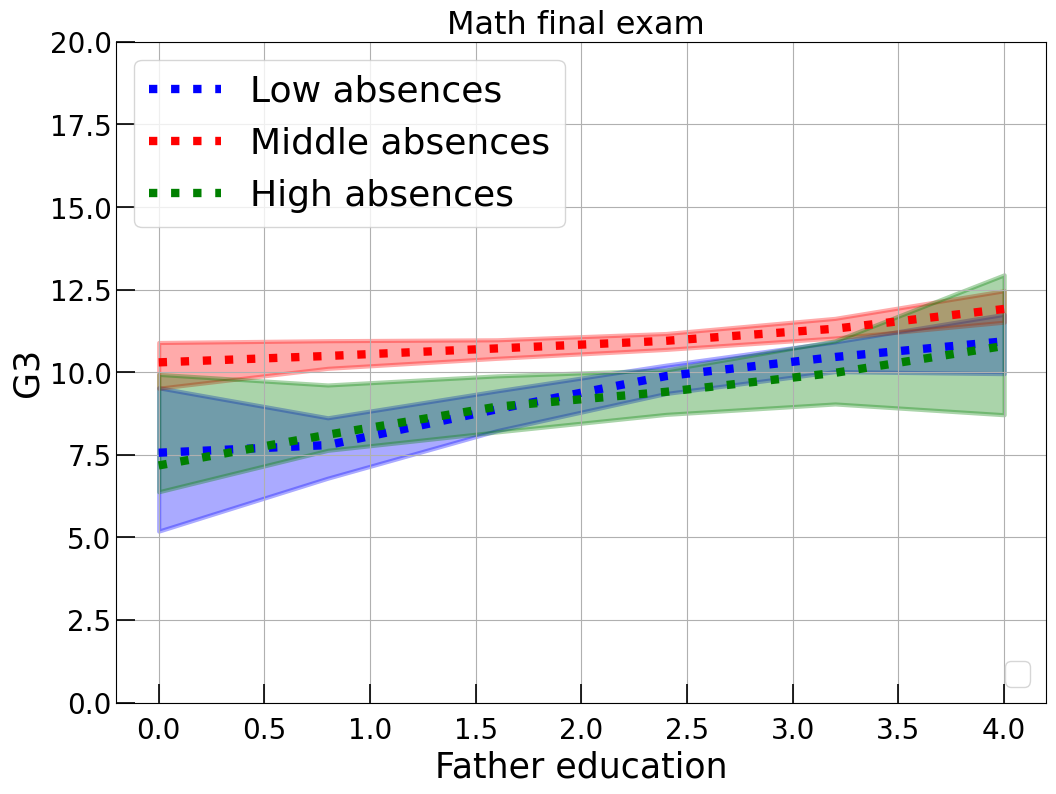

In [10]:
for exam, df, mean_std, bins in DF:


  if exam == 'Math':
    layers = [0-0.5, 2.5, 21.5, max(df['absences'])+1]
    bins = 6
  else:
    layers = [0-0.5, 5.5, 21.5, max(df['absences'])+1]
    bins = 34

  _, ax = kl.Plot_Fit_Summary_Split(df, 'Fedu', 'G3',  'absences', split_bins=layers,
                                  split_mode = 'Data', y_err=None, bins=bins, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=100, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['blue', 'red', 'green'], cmap = None, ax=None)

  ax.flat[1].set_visible(False)
  ax.flat[2].set_visible(False)

  ax[0].lines[0].set_label(None)
  ax[0].lines[1].set_label(None)
  ax[0].lines[2].set_label(None)


  for line in ax[0].get_lines()[:]: line.set_linewidth(6)

  legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ['Low absences', 'Middle absences', 'High absences'], prop={'size':26}, loc=2)
  ax[0].add_artist(legend1)
  ax[0].legend(loc=4, prop={'size':23})

  s = exam

  ax[0].set_ylabel('G3', size=25)
  ax[0].set_xlabel('Father education', size=25)
  ax[0].tick_params(labelbottom=True)
  ax[0].set_title("%s final exam "%s, size=23)
  ax[0].set_ylim(0,20)

### School Difference

We did not see any significant difference with respect to mother or father education used as our x-axis. Thus, here we focus only on mother education as a reference.

100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


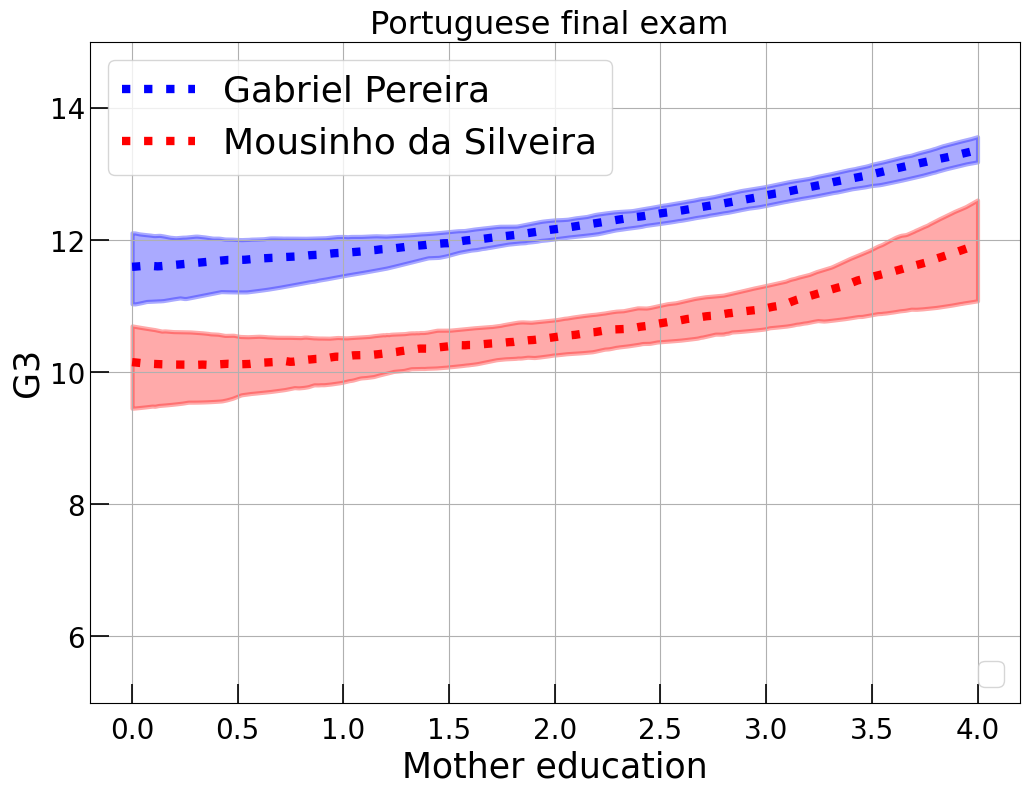

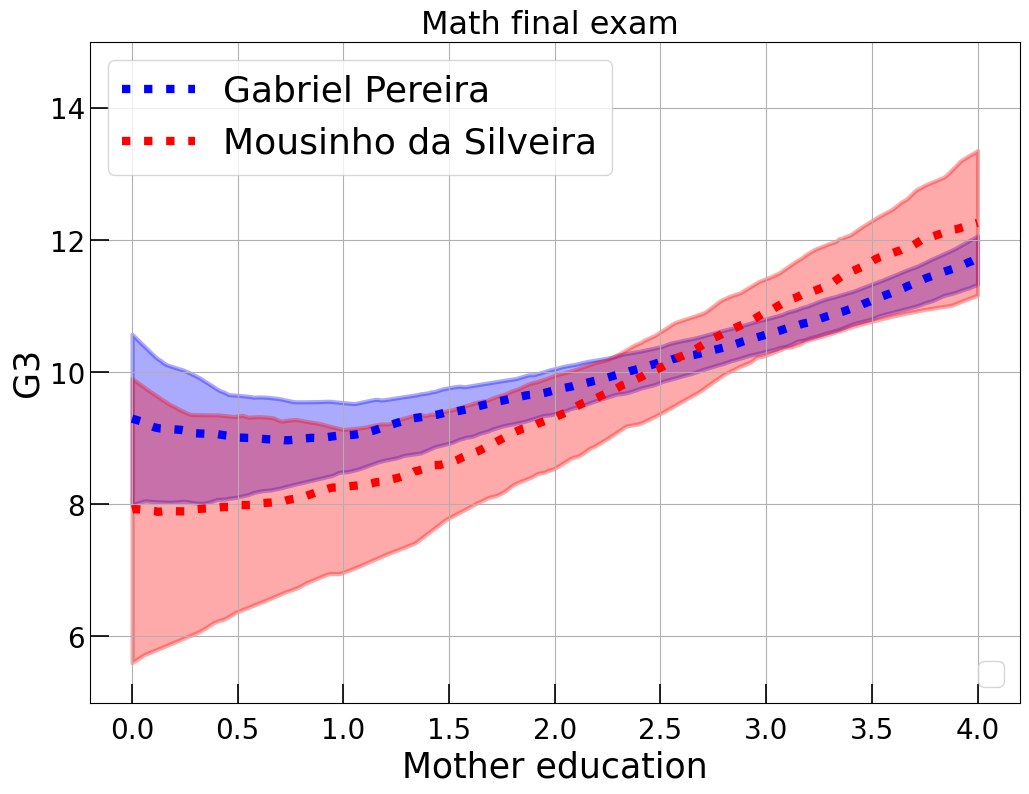

In [11]:
for exam, df, mean_std, bins in DF:

  _, ax = kl.Plot_Fit_Summary_Split(df, 'Medu', 'G3',  'school', split_bins=[-0.1,0.5,1.1],
                                  split_mode = 'Data', y_err=None, bins=bins, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=100, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['blue', 'red', 'green'], cmap = None, ax=None)

  ax.flat[1].set_visible(False)
  ax.flat[2].set_visible(False)

  ax[0].lines[0].set_label(None)
  ax[0].lines[1].set_label(None)


  for line in ax[0].get_lines()[:]: line.set_linewidth(6)

  legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['Gabriel Pereira', 'Mousinho da Silveira'], prop={'size':26}, loc=2)
  ax[0].add_artist(legend1)
  ax[0].legend(loc=4, prop={'size':23})

  s = exam

  ax[0].set_ylabel('G3', size=25)
  ax[0].set_xlabel('Mother education', size=25)
  ax[0].tick_params(labelbottom=True)
  ax[0].set_title("%s final exam "%s, size=23)
  ax[0].set_ylim(5,15)